This notebook generates a UMAP for the original, unprocessed ArI dataset

In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import umap
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import colorsys

# Doyle colors
doyle_colors = ["#CE4C6F", "#1561C2", "#188F9D","#C4ADA2","#515798", "#CB7D85", "#A9A9A9"]
# extension of palette with lighter and darker versions
def adjust_lightness(color, factor=1.2):
    """
    Function to make colors lighter (factor > 1) or darker (factor < 1).
    """
    r, g, b = mcolors.to_rgb(color)
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    l = max(0, min(1, l * factor))
    r, g, b = colorsys.hls_to_rgb(h, l, s)
    return mcolors.to_hex((r, g, b))

lighter = [adjust_lightness(c, 1.2) for c in doyle_colors]
darker  = [adjust_lightness(c, 0.7) for c in doyle_colors]
all_colors = doyle_colors + darker + lighter

# Save the categorical colormap
cat_cmap = ListedColormap(all_colors, name="Doyle_cat")
plt.colormaps.register(cat_cmap)

# Define and save a continuous colormap
colors = [doyle_colors[1],"#FFFFFFD1",doyle_colors[0]]
cont_cmap = LinearSegmentedColormap.from_list("Doyle_cont", colors)
plt.colormaps.register(cont_cmap)

# General plt parameters
plt.rcParams.update({
    "axes.titlesize": 20,        # Subplot title
    "axes.labelsize": 16,        # X and Y labels
    "figure.titlesize": 24,      # Suptitle
    "xtick.labelsize": 14,       # X tick labels
    "ytick.labelsize": 14,       # Y tick labels
    "legend.fontsize": 14,       # Legend text
    "legend.title_fontsize": 14  # Legend titles
})

In [2]:
df_labelled = pd.read_csv("./Datasets/Datasets_Initial_Trends/ArI_data_dft_unfiltered.csv", index_col=0,header=0)
df_data = df_labelled.copy(deep=True)
df_data = df_data.drop(columns='rate')  # drop the objective values
df_data = pd.DataFrame(scale(df_data),df_data.index,df_data.columns)
objectives = ["rate"]
wdir = Path(".")


In [3]:
df_data

,E,ES_root_dipole,ES_root_electronic_spatial_extent,ES_root_molar_volume,E_thermal_correction,dipole,electronegativity,hardness,homo_energy,lumo_energy,...,C1_NPA_charge,C1_NPA_core,C1_VBur,I1_APT_charge,I1_ES_root_Mulliken_charge,I1_ES_root_NPA_Rydberg,I1_Mulliken_charge,I1_NMR_anisotropy,I1_NMR_shift,I1_NPA_Rydberg
can,,,,,,,,,,,,,,,,,,,,,
BrC(C1=CC=CC=C1)C1=C(I)C=CC=C1,-1.843072,-0.431094,0.482286,1.620858,0.820302,-0.333061,0.245034,0.713759,-0.636847,0.132485,...,1.055946,-0.482548,1.618998,-0.479976,-0.073761,0.985890,-0.366169,-1.087884,0.273473,-1.254620
BrC1=C(Br)C=C(I)C(I)=C1,-3.996992,-0.948593,0.556058,1.573309,-1.364168,-1.876815,1.050509,-0.574437,-0.695517,-1.092421,...,-0.086738,-2.653724,0.459616,1.021140,0.311537,-0.411713,1.353593,1.859709,-2.423500,0.825973
BrC1=C(Br)C=C(I)C=C1,-3.986930,-0.976030,-0.103114,0.085368,-1.215511,-1.000158,0.163681,0.717839,-0.560364,0.198624,...,0.418295,0.570822,-1.041545,-0.360387,-0.017120,0.748340,0.190944,1.211237,-0.786373,0.209508
BrC1=C(C(I)=CC=C1)N(=O)=O,-1.781838,0.505979,-0.452517,-0.813621,-0.987992,1.750068,1.964460,-0.887352,-1.405232,-1.957473,...,0.144562,-0.880224,0.856558,1.476088,1.234488,-1.188718,2.105892,0.684730,-0.891364,1.373942
BrC1=C(C=C(I)C=C1)C#N,-1.677310,0.418897,-0.294439,-1.414687,-1.067915,1.339459,1.102772,-0.188871,-0.961981,-0.957567,...,0.077355,0.570822,-1.070413,0.152913,1.644661,-1.421456,0.710177,1.155733,-1.033997,0.414996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
[H][C@@](N)(CC1=CC(I)=C(O)C(I)=C1)C(O)=O,0.423688,0.016277,0.350008,0.441395,0.590274,3.399447,0.127071,-0.445935,0.126627,-0.304122,...,-0.579074,0.087044,0.138594,0.088053,0.021731,-0.530368,0.174495,0.011728,0.309237,0.551299
[H][C@@](N)(CC1=CC=C(O)C(I)=C1)C(O)=O,0.433755,0.968510,0.142897,0.780929,0.735339,1.751538,-0.718653,0.299648,0.528051,0.704690,...,-1.200555,0.043904,0.175978,-0.604839,-1.148249,0.311517,-0.296980,-1.543364,2.080814,-0.526008
[H][C@](N)(CC1=CC(I)=C(O)C=C1)C(=O)OC,0.397195,0.319438,0.298328,1.247292,1.219571,-0.444363,-0.920778,0.333795,0.704635,0.879985,...,-1.108144,-0.066134,0.764887,-0.374916,-1.164732,0.422813,-0.458440,-1.338208,1.806858,-0.217670


In [4]:
fit = umap.UMAP(n_neighbors=40,min_dist=0.7,n_components=2,metric="euclidean",random_state=12)
df_umap = pd.DataFrame(fit.fit_transform(df_data),df_data.index,["UMAP1","UMAP2"])


Rate data overlaid on the UMAP:


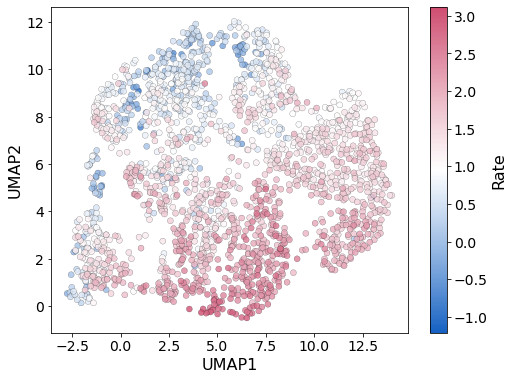

In [5]:
# map the rate data onto the UMAP
for index in df_umap.index:
    df_umap.loc[index,"rate"] = df_labelled.loc[index,"rate"]
df_umap.sort_values(by="rate",inplace=True)
print("Rate data overlaid on the UMAP:")
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_umap, x="UMAP1", y="UMAP2",hue="rate", palette="Doyle_cont",legend=False,alpha=0.8,edgecolor='k', linewidth=0.2)
# Add a colorbar for the 'hue' (selected/ removed points)
norm = mpl.colors.Normalize(vmin=df_umap["rate"].min(), vmax=df_umap["rate"].max())  # Normalize the colorscale
sm = plt.cm.ScalarMappable(cmap="Doyle_cont", norm=norm)
sm.set_array([])  # Empty array for ScalarMappable
cbar = plt.colorbar(sm)
cbar.set_label('Rate')  # Label for the colorbar
plt.show()

In [6]:
df_umap.drop(columns="rate",inplace=True)
df_umap.to_csv(wdir.joinpath("ArI_UMAP_coords_unprocessed.csv"),index=True,header=True)

UMAPs for the hyperparameter optimization are generated in section 4_Clustering_Comparisons in the notebook Clustering_Doyle_ArI.ipynb